In [9]:
import pandas as pd

fonte = './dados/MICRODADOS_ENEM_2019_SAMPLE_43278.csv'

dados = pd.read_csv(fonte)

dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


**Desafio 01**: Proporção dos inscritos por idade.

In [100]:
# total = len(dados['NU_IDADE'])
# (dados['NU_IDADE'].value_counts() / total * 100).sort_index().head()
dados['NU_IDADE'].value_counts(normalize=True).head().sort_index() # correção

16    0.061470
17    0.166871
18    0.168409
19    0.113189
20    0.081748
Name: NU_IDADE, dtype: float64

**Desafio 02**: Descobrir de quais estados são os inscritos com 13 anos.

In [99]:
dados.query('NU_IDADE == 13')[['NU_IDADE', 'SG_UF_RESIDENCIA']]

,NU_IDADE,SG_UF_RESIDENCIA
57359,13,SP
95630,13,MT
98197,13,AP
116501,13,BA


**Desafio 03**: Adicionar título no gráfico.

<AxesSubplot:title={'center':'Distribuição das notas de Redação'}, ylabel='Frequency'>

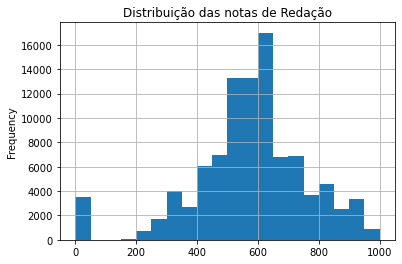

In [101]:
dados['NU_NOTA_REDACAO'].plot.hist(bins=20, title='Distribuição das notas de Redação', grid=True)

**Desafio 04**: Plotar os Histogramas das idades dos do treineiro e não treineiros.

<AxesSubplot:>

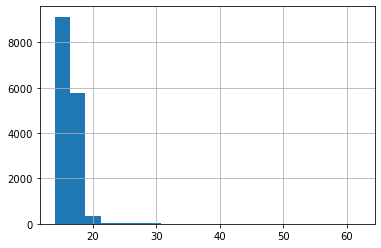

In [103]:
treineiros = dados.query('IN_TREINEIRO == 1')
treineiros['NU_IDADE'].hist(bins=20)

<AxesSubplot:>

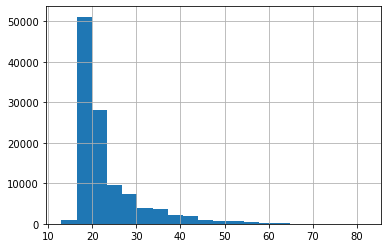

In [104]:
ntreineiro = dados.query("IN_TREINEIRO == 0")
ntreineiro['NU_IDADE'].hist(bins=20)

**Desafio 05**: Comparar as distribuições das provas em inglês e espanhol.

<AxesSubplot:>

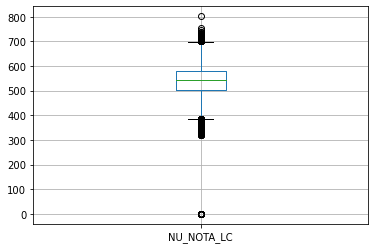

In [114]:
ingles = dados.query('TP_LINGUA == 0')
ingles['NU_NOTA_LC'].plot.box(grid=True)

<AxesSubplot:>

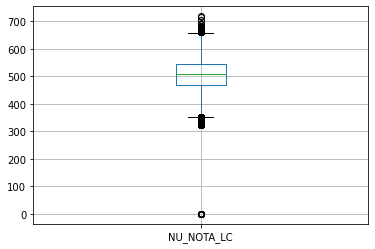

In [115]:
espanhol = dados.query('TP_LINGUA == 1')
espanhol['NU_NOTA_LC'].plot.box(grid=True)

**Desafio 06**: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

array([[<AxesSubplot:title={'center':'Inglês'}>,
        <AxesSubplot:title={'center':'Espanhol'}>]], dtype=object)

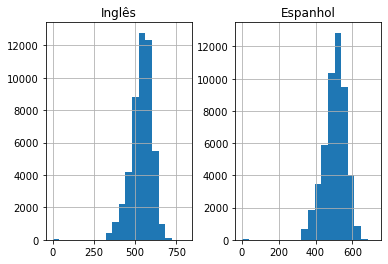

In [125]:
linguas = ['Inglês', 'Espanhol']
dados_linguas = pd.concat([ingles['NU_NOTA_LC'], espanhol['NU_NOTA_LC']], axis=1, names=linguas)
dados_linguas.columns = linguas
dados_linguas.hist(bins=20)